# EDA Analysis & Split Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)


plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [3]:
data = pd.read_pickle('/Users/ellykyles/capstone2/data/cleaned_corpus.pkl')

In [4]:
data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,token_words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[bought, sever, vital, can, dog, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]"


In [5]:
data['join_token'] = data['token_words'].apply(lambda x: ' '.join(x))

In [6]:
len(data[data["HelpfulnessNumerator"] !=data['HelpfulnessDenominator']])

115093

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  clean_text              568454 non-null  object
 11  token_words             568454 non-null  object
 12  join_token              568454 non-null  object
dtypes: int64(5), object(8)
memory usage: 56.4+ MB


In [8]:
from datetime import datetime as dt
data['Date'] = pd.to_datetime(data['Time'], unit='s')

In [9]:
data['Date'] 

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Date, Length: 568454, dtype: datetime64[ns]

In [10]:
data['year'] = data['Date'].dt.year

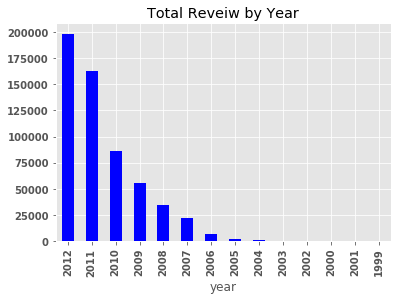

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
data.groupby('year')['ProductId'].count().sort_values(ascending = False).plot.bar(color='b')
plt.title('Total Reveiw by Year')
plt.savefig('Total_Review_Year')

In [12]:
filter_data = data[data.Date.dt.year >2010 ]

In [13]:
filter_data.shape

(361958, 15)

In [14]:
filter_data.shape[0]/data.shape[0]

0.6367410555647423

# Split Train and Test Data Set

In [16]:
def count_voca(text):
    return len(text.split())
def unique_voca(text):
    return len(text)

In [17]:
filter_data['words_count'] = filter_data['clean_text'].apply(count_voca)
filter_data['unique_words'] = filter_data['token_words'].apply(unique_voca)

In [18]:
filter_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,token_words,join_token,Date,year,words_count,unique_words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[bought, sever, vital, can, dog, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]",bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better,2011-04-27,2011,48,23


In [19]:
from sklearn.model_selection import ShuffleSplit
rs=ShuffleSplit(n_splits=2, test_size=.3)
rs.get_n_splits(filter_data)

2

In [20]:
for train_index, test_index in rs.split(filter_data): 
    test_data = filter_data.iloc[test_index]
    train_data = filter_data.iloc[train_index]

In [21]:
test_data.shape

(108588, 17)

In [22]:
train_data.shape

(253370, 17)

In [26]:
test_data.to_pickle('/Users/ellykyles/capstone2/data/test.pkl')
train_data.to_pickle('/Users/ellykyles/capstone2/data/train.pkl')

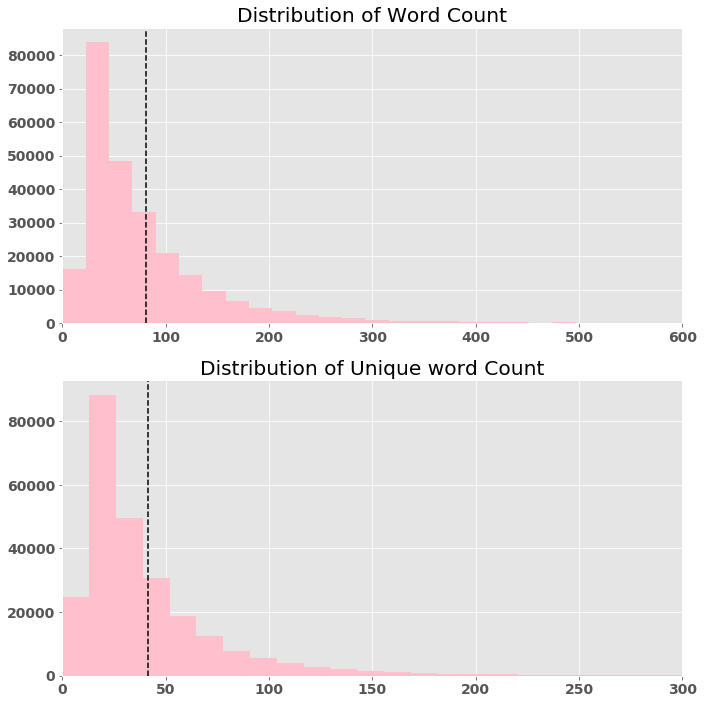

In [24]:
fig, axs = plt.subplots((2), figsize = (10,10))
axs[0].hist(train_data['words_count'], bins = 150, color = 'pink')
axs[0].set_title("Distribution of Word Count")
axs[0].axvline(train_data['words_count'].mean(), c= 'k', linestyle = '--')
axs[1].hist(train_data['unique_words'], bins = 150, color = 'pink')
axs[1].axvline(train_data['unique_words'].mean(), c = 'k', linestyle = '--')
axs[1].set_title("Distribution of Unique word Count")
axs[0].set_xlim((0,600))
axs[1].set_xlim((0, 300))
plt.tight_layout()
plt.savefig('Distribution_Words')

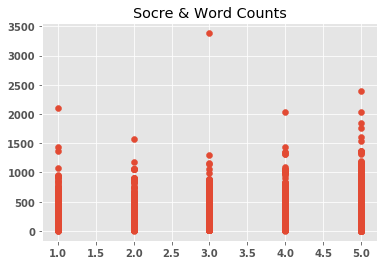

In [70]:
plt.scatter(train_data['Score'], train_data['words_count'])
plt.title("Socre & Word Counts");
plt.savefig('socre_scatter')

# Train_pickle Data

In [27]:
train_data = pd.read_pickle('/Users/ellykyles/capstone2/data/train.pkl')

In [28]:
train_data[(train_data['words_count'] ==0) | (train_data['words_count'] <5)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,token_words,join_token,Date,year,words_count,unique_words
233938,233939,B003E6COMO,A2ZE58VIDDCMR7,inna,1,2,5,1350000000,&#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#1103; &#1091;&#1087;&#1072;&#1082;&#1086;&#1074;&#1082;&#1072;,"&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1079;&#1072;&#1082;&#1072;&#1079;&#1072;&#1090;&#1100; &#1101;&#1090;&#1080; &#1078;&#1077;&#1083;&#1072;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1090;.&#1082;. &#1076;&#1086;&#1095;&#1082;&#1072; &#1087;&#1086;&#1096;&#1083;&#1072; &#1074; &#1096;&#1082;&#1086;&#1083;&#1091; &#1080; &#1090;&#1088;&#1077;&#1073;&#1091;&#1077;&#1090; &#1089;&#1083;&#1072;&#1076;&#1086;&#1089;&#1090;&#1080;. &#1054;&#1095;&#1077;&#1085;&#1100; &#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#1103; &#1091;&#1087;&#1072;&#1082;&#1086;&#1074;&#1082;&#1072;. &#1050;&#1072;&#1082; &#1088;&#1072;&#1079; &#1089;&#1090;&#1086;&#1083;&#1100;&#1082;&#1086; &#1082;&#1086;&#1085;&#1092;&#1077;&#1090;, &#1082;&#1072;&#1082; &#1080; &#1090;&#1088;&#1077;&#1073;&#1091;&#1077;&#1090;&#1089;&#1103;, &#1095;&#1090;&#1086;&#1073;&#1099; &#1089;&#1100;&#1077;&#1089;&#1090;&#1100; &#1080;&#1093; &#1079;&#1072; &#1087;&#1077;&#1088;&#1077;&#1084;&#1077;&#1085;&#1091;.",,[],,2012-10-12,2012,0,0
446822,446823,B004PENLO4,ARJB3TQC9PIDB,me,0,0,5,1330560000,goood,"Price couldf been lower........... ........ ............... .................... .,,.,... ............ .. ...... ........ . ..........:.............. ....:.:............ .....,.,., .. ... ............. :........ .:..... .......... ........... ............. ........:... :............. ...... ..........: . :.......... ....... ....... ........",price couldf been lower,"[price, couldf, lower]",price couldf lower,2012-03-01,2012,4,3


not yet to excute the code 

not_interested_columns = ['Time', 'Text']
train_data = train_data.drop(columns = not_interested_columns)

In [29]:
train_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,token_words,join_token,Date,year,words_count,unique_words
491450,491451,B005A1LH0Q,A2Z3EDGYBA75F5,Jeanne R. Michon,2,2,4,1322611200,Great snack,"I was pleasantly surprised at these little snacks. Thought sure they wouldn't fill me up, but they did. Had just the right amount of crunch and a hint of cinnamon flavor that was not overpowering or bitter.",i was pleasantly surprised at these little snacks thought sure they wouldnt fill me up but they did had just the right amount of crunch and a hint of cinnamon flavor that was not overpowering or bitter,"[pleasantli, surpris, littl, snack, thought, sure, wouldnt, fill, right, amount, crunch, hint, cinnamon, flavor, overpow, bitter]",pleasantli surpris littl snack thought sure wouldnt fill right amount crunch hint cinnamon flavor overpow bitter,2011-11-30,2011,37,16


In [30]:
grouped_scores=train_data.groupby('Score')['ProductId'].count().sort_values(ascending = False)
grouped_scores = grouped_scores/sum(grouped_scores)
grouped_scores

Score
5    0.622248
4    0.143577
1    0.099515
3    0.078743
2    0.055918
Name: ProductId, dtype: float64

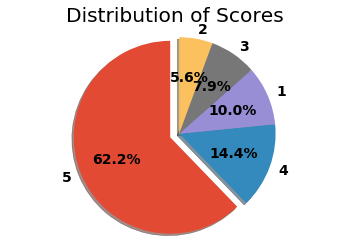

In [31]:
labels = grouped_scores.index
sizes = grouped_scores * 100
explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Scores')
plt.savefig('Scores_total')
plt.show()

In [32]:
data_2011 = train_data[train_data['year'] == 2011]
data_2012 = train_data[train_data['year'] == 2012]
grouped_scores_2011=data_2011.groupby('Score')['ProductId'].count().sort_values(ascending = False)
grouped_scores_2012=data_2012.groupby('Score')['ProductId'].count().sort_values(ascending = False)

#  Active Users Analysis

In [33]:
train_data = pd.read_pickle('train.pkl')
users=train_data.UserId.value_counts()


In [35]:
# define activer_users as they gave more than 50 reviews
active_user_id = users[users>50]

active_user =train_data['UserId'].isin(active_user_id.index)

active_user_df = train_data[active_user]

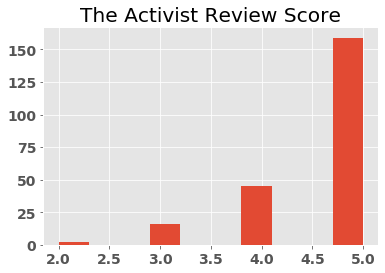

In [36]:
most_active_user=active_user_df[active_user_df['UserId'] =='AY12DBB0U420B']
most_active_user['Score'].hist();
plt.title('The Activist Review Score');

In [38]:
# the most active user 
vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(most_active_user['join_token'])

In [39]:
x_most_active_matrix=X.toarray()
the_most_active=pd.DataFrame(x_most_active_matrix.sum(axis =0), index = vectorizer.get_feature_names(), columns =['count'])
the_most_active.sort_values(by='count', ascending = False).iloc[:10, :]

,count
good,336
br,264
peterson,221
gari,221
well,219
like,218
one,189
tast,163
theyr,153
tri,140


In [41]:
# to check the br word 
mask = most_active_user['clean_text'].str.contains('br') 
most_active_user[mask][['Text','clean_text','token_words']].iloc[:2]


,Text,clean_text,token_words
371318,"I bought a few of these Nongshim noodle soups because they're easy to store and very handy for making a quick lunch on busy days. The latest I tried today was the Savory Bowl Noodle Soup, Chicken Flavor (3.03 ounces). It was quite good, much better than many other brands I've had in the past. The broth was particularly good. Very tasty. My reservations for food dishes such as this is the high sodium content. The soup doesn't taste particularly salty, but the nutrition label says a lot. I counter this by not having such dishes very often. However, if you're going to have these bowls now and then, this is quite a good one, the best I can remember.<br /><br />Gary Peterson",i bought a few of these nongshim noodle soups because theyre easy to store and very handy for making a quick lunch on busy days the latest i tried today was the savory bowl noodle soup chicken flavor ounces it was quite good much better than many other brands ive had in the past the broth was particularly good very tasty my reservations for food dishes such as this is the high sodium content the soup doesnt taste particularly salty but the nutrition label says a lot i counter this by not having such dishes very often however if youre going to have these bowls now and then this is quite a good one the best i can rememberbr br gary peterson,"[bought, nongshim, noodl, soup, theyr, easi, store, handi, make, quick, lunch, busi, day, latest, tri, today, savori, bowl, noodl, soup, chicken, flavor, ounc, quit, good, much, better, mani, brand, ive, past, broth, particularli, good, tasti, reserv, food, dish, high, sodium, content, soup, doesnt, tast, particularli, salti, nutrit, label, say, lot, counter, dish, often, howev, your, go, bowl, quit, good, one, best, rememberbr, br, gari, peterson]"
29079,"Our nearby Fresh and Easy grocery store has a small section of premium soft drinks and some of them are really good. Just recently I purchased a 4-pack of Izze Sparkling Blackberry. It's an assortment of concentrated fruit juices dominated by blackberry with added carbonated water. The label says 70% fruit juices. This is not your average fruit-flavored soda pop, folks. This is real fruit juice and with no added sugar. The taste is delicious and the blackberry stands out real nicely. The drink has a lot of natural sugars, but you don't get that sickening sweet taste I associate with so many of the cheaper soft drinks. In fact, the drink has a slight sour bite to it and it's very pleasant. This stuff is more expensive, but maybe it's worth it. Personally, I'm looking forward to trying some of the other varieties.<br /><br />Gary Peterson",our nearby fresh and easy grocery store has a small section of premium soft drinks and some of them are really good just recently i purchased a of izze sparkling blackberry its an assortment of concentrated fruit juices dominated by blackberry with added carbonated water the label says fruit juices this is not your average fruitflavored soda pop folks this is real fruit juice and with no added sugar the taste is delicious and the blackberry stands out real nicely the drink has a lot of natural sugars but you dont get that sickening sweet taste i associate with so many of the cheaper soft drinks in fact the drink has a slight sour bite to it and its very pleasant this stuff is more expensive but maybe its worth it personally im looking forward to trying some of the other varietiesbr br gary peterson,"[nearbi, fresh, easi, groceri, store, small, section, premium, soft, drink, realli, good, recent, purchas, izz, sparkl, blackberri, assort, concentr, fruit, juic, domin, blackberri, ad, carbon, water, label, say, fruit, juic, averag, fruitflavor, soda, pop, folk, real, fruit, juic, ad, sugar, tast, delici, blackberri, stand, real, nice, drink, lot, natur, sugar, dont, get, sicken, sweet, tast, associ, mani, cheaper, soft, drink, fact, drink, slight, sour, bite, pleasant, stuff, expens, mayb, worth, person, i

In [42]:
# active users' reviews
vectorizer_active_user = CountVectorizer(max_features=500)
X_active_user = vectorizer_active_user.fit_transform(active_user_df['join_token'])
x_active_user_matrix=X_active_user.toarray()
features = vectorizer_active_user.get_feature_names()

In [43]:
the_active=pd.DataFrame(x_active_user_matrix.sum(axis =0), index = features, columns =['count'])
the_active.sort_values(by='count', ascending = False).iloc[:10, :]

,count
br,5714
like,3233
flavor,3098
good,2692
tast,2465
one,2338
food,1744
tri,1594
tea,1553
use,1501


In [44]:
vectorizer_total = CountVectorizer(max_features=5000)
X_total = vectorizer_total.fit_transform(train_data['join_token'])
x_total_matrix=X_total.toarray()

In [45]:
features = vectorizer_total.get_feature_names()
features[:30]

['abil',
 'abl',
 'aboutbr',
 'abr',
 'absolut',
 'absorb',
 'abund',
 'academi',
 'acai',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accur',
 'accustom',
 'ach',
 'achiev',
 'acid',
 'acn',
 'acquir',
 'across',
 'act',
 'action',
 'activ']

#  Clean the words that doesn't make sense - ex) br, ive, ill

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
stop_words =stopwords.words('english')
import re
import string
#ps = PorterStemmer()

In [47]:
stop_words.extend(['br','ive','gari', 'peterson'])

In [48]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [49]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    new_text = ' '.join([word for word in text if word not in stop_words])
    return new_text

#round1 = lambda x: clean_text_round1(x)

In [50]:
test_data = pd.read_pickle('/Users/ellykyles/capstone2/data/test.pkl')
test_data['new_token_words'] = test_data['token_words'].apply(clean_text_round2)

In [51]:
test_data.to_pickle('/Users/ellykyles/capstone2/data/test.pkl/test.pkl')

In [52]:
train_data['new_token_words'] = train_data['token_words'].apply(clean_text_round2)

In [53]:
train_data.to_pickle('/Users/ellykyles/capstone2/data/train.pkl')